<a href="https://colab.research.google.com/github/lizzyzacharias/Gold-Standard-Pipeline-Guide/blob/main/Week7_Pancreatic_Cancer_Underweight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To solve the question: "What are the genetic factors related to Pancreatic Cancer when considering the influence of underweight?"

### 1. Data Preprocessing

In [1]:
# This cell is only for use on Google Colab. Skip it if you run your code in other environments

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA/TCGA_Pancreatic_Cancer_(PAAD)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.PAAD.sampleMap_HiSeqV2_PANCAN.gz  TCGA.PAAD.sampleMap_PAAD_clinicalMatrix


In [2]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.PAAD.sampleMap_PAAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.PAAD.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,_GENOMIC_ID_TCGA_PAAD_RPPA,_GENOMIC_ID_TCGA_PAAD_hMethyl450,_GENOMIC_ID_TCGA_PAAD_mutation,_GENOMIC_ID_TCGA_PAAD_PDMRNAseq,_GENOMIC_ID_TCGA_PAAD_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PAAD_mutation_broad_gene,_GENOMIC_ID_TCGA_PAAD_gistic2thd,_GENOMIC_ID_data/public/TCGA/PAAD/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PAAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_PAAD_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,NaN,TCGA-2J-AAB1-01A-11D-A40Y-05,NaN,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01A-11D-A40W-08,TCGA-2J-AAB1-01A-11D-A40V-01,TCGA-2J-AAB1-01,TCGA-2J-AAB1-01,bf6773cf-f233-4990-885e-56073c92cb0c
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,118DE429-5F7E-4622-8F85-151925B6949B,TCGA-2J-AAB4-01A-12D-A40Y-05,NaN,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01A-12D-A40W-08,TCGA-2J-AAB4-01A-12D-A40V-01,TCGA-2J-AAB4-01,TCGA-2J-AAB4-01,435de9a0-3c2b-4b4f-87d1-92f37a0765b5
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,NaN,TCGA-2J-AAB6-01A-11D-A40Y-05,NaN,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01A-11D-A40W-08,TCGA-2J-AAB6-01A-11D-A40V-01,TCGA-2J-AAB6-01,TCGA-2J-AAB6-01,a737c8ad-5796-47f9-8505-4e7fb2a297ed
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,A64C3BC6-4748-4904-88E8-B62DFB3EE6DE,TCGA-2J-AAB8-01A-12D-A40Y-05,NaN,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01A-12D-A40W-08,TCGA-2J-AAB8-01A-12D-A40V-01,TCGA-2J-AAB8-01,TCGA-2J-AAB8-01,b9173a1f-a255-4e0e-88d2-ded795ba0e7b
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,A04E5FF9-552D-462D-B9EE-23B9933324E0,TCGA-2J-AAB9-01A-11D-A40Y-05,NaN,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01A-11D-A40W-08,TCGA-2J-AAB9-01A-11D-A40V-01,TCGA-2J-AAB9-01,TCGA-2J-AAB9-01,23da230e-1c63-4e5b-bf92-8a1bec33073c


In [5]:
# Display gene dataset
gene_data.head()

,TCGA-2L-AAQL-01,TCGA-2J-AABI-01,TCGA-3A-A9J0-01,TCGA-3A-A9I7-01,TCGA-2J-AABO-01,TCGA-IB-7890-01,TCGA-3A-A9IN-01,TCGA-HZ-7926-01,TCGA-3A-A9IH-01,TCGA-2J-AABH-01,...,TCGA-IB-8127-01,TCGA-S4-A8RM-01,TCGA-F2-A7TX-01,TCGA-2L-AAQI-01,TCGA-2J-AABP-01,TCGA-RB-A7B8-01,TCGA-2L-AAQA-01,TCGA-FB-AAQ6-01,TCGA-IB-7644-01,TCGA-HV-A5A5-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.379008,-0.290592,0.523208,0.279108,-0.061792,-0.419192,1.157208,0.066408,0.628808,0.422908,...,0.264208,-0.148192,0.624208,0.557108,-0.010292,0.147308,-0.176392,0.470408,0.386908,1.132608
HIF3A,1.143574,0.888074,-0.051326,-0.905626,1.658974,0.180474,2.690974,-0.452926,-0.021726,1.988574,...,1.553974,3.349674,-0.668026,1.703374,-1.485926,1.379174,1.034974,1.781274,-0.795926,1.035074
RNF17,-0.531035,-0.531035,-0.531035,0.650365,-0.531035,-0.531035,3.417065,0.799765,-0.531035,2.682365,...,-0.531035,-0.531035,-0.531035,0.040265,-0.531035,0.950365,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.147228,-0.691372,-0.129972,0.157928,0.310928,-0.479772,0.269928,-0.164272,-0.305572,-0.260872,...,-0.243172,-0.137372,0.412528,-0.349872,0.072528,-0.023372,-0.242972,0.351328,-0.172972,0.033928
RNF11,-0.690578,-1.758278,-0.533078,-0.332878,-0.412278,0.439922,-0.184478,0.124022,-0.115578,-1.161878,...,0.021122,-0.852678,-0.352878,-0.397278,-0.240478,-0.274678,-0.831078,-0.992578,0.070022,-0.297678


In [6]:
# Set Basic info

#gene_fullname = 'BRCA gene'
#gene = 'brca'
trait = 'Pancreatic Cancer'
condition = 'underweight'
condition_col = 'initial_weight'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 114 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,MSS,TCGA-2J-AAB1-01,TCGA-2J-AAB1,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,65,...,-0.748878,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488
TCGA-2J-AAB4-01,MSS,TCGA-2J-AAB4-01,TCGA-2J-AAB4,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NO,NO,YES,48,...,0.675222,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888
TCGA-2J-AAB6-01,MSS,TCGA-2J-AAB6-01,TCGA-2J-AAB6,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,75,...,-0.748878,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988
TCGA-2J-AAB8-01,MSS,TCGA-2J-AAB8-01,TCGA-2J-AAB8,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,71,...,-0.748878,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188
TCGA-2J-AAB9-01,MSS,TCGA-2J-AAB9-01,TCGA-2J-AAB9,TCGA Pancreatic Cancer (PAAD),pancreatic adenocarcinoma,Pancreas,NaN,NaN,YES,70,...,-0.748878,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788


In [8]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,0.0,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.748878,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488
TCGA-2J-AAB4-01,160.0,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.675222,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888
TCGA-2J-AAB6-01,0.0,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-0.748878,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988
TCGA-2J-AAB8-01,170.0,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.748878,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188
TCGA-2J-AAB9-01,140.0,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,-0.748878,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,initial_weight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pancreatic Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,0.0,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488,1
TCGA-2J-AAB4-01,160.0,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888,1
TCGA-2J-AAB6-01,0.0,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988,1
TCGA-2J-AAB8-01,170.0,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188,1
TCGA-2J-AAB9-01,140.0,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788,1


### 2. Preliminary analysis

Plot the distributions of the target and important regressors

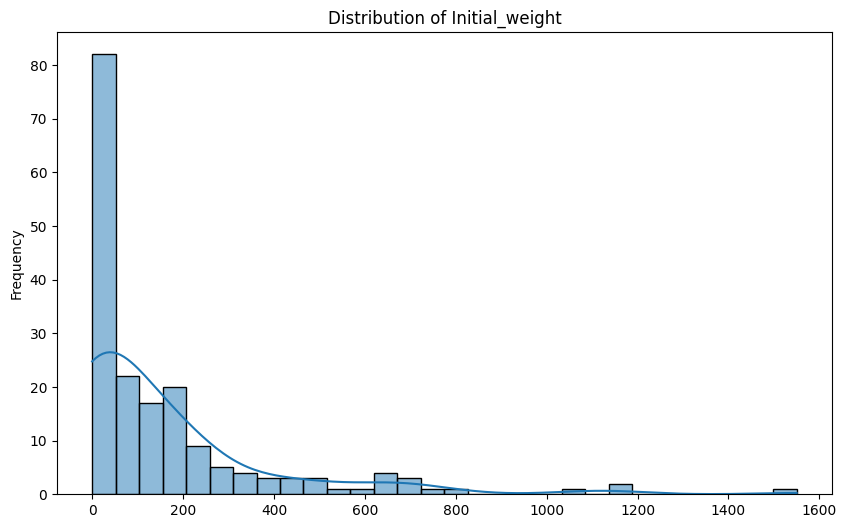

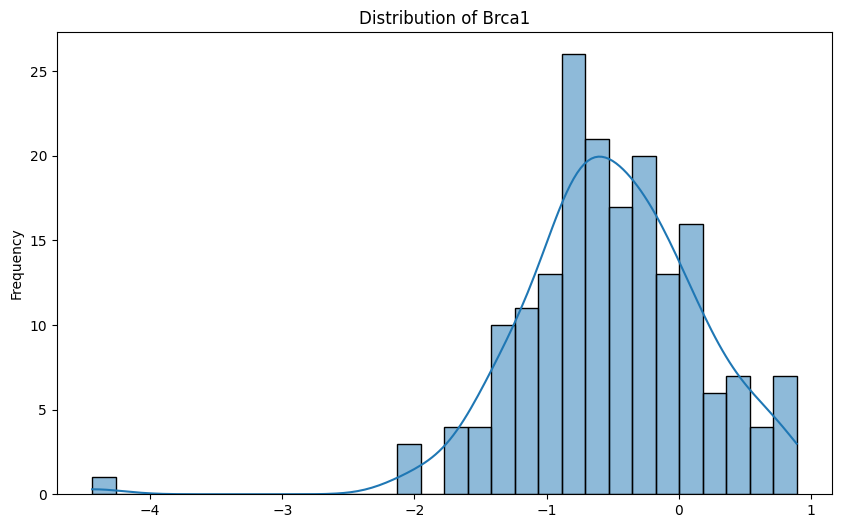

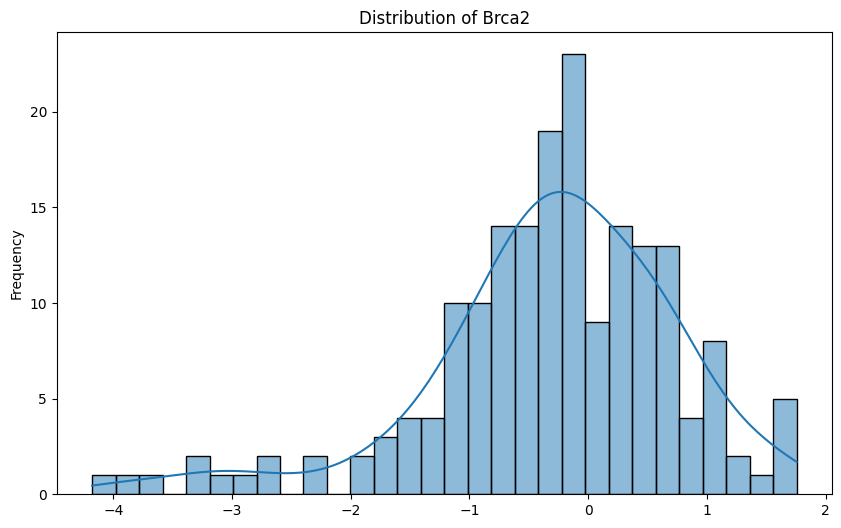

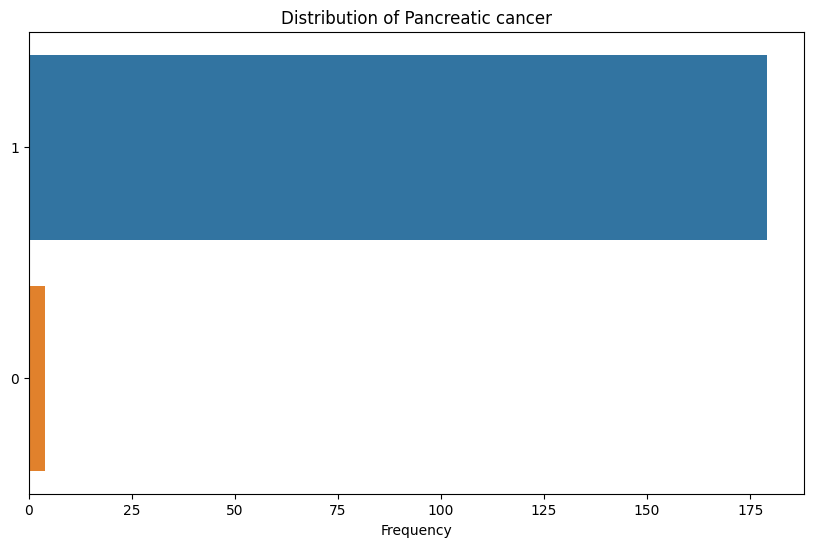

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'brca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

Then, draw scatter plots to visualize the relationship between pairs of variables (Optional)

In [11]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,underweight,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pancreatic Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1-01,0,-0.072992,3.176274,0.042165,0.133528,-0.736678,-0.19891,0.071506,0.747254,-0.423399,...,-0.604817,0.599267,-1.28139,-0.223977,0.502114,0.385573,0.775305,2.372667,0.829488,1
TCGA-2J-AAB4-01,0,0.654608,0.380374,-0.531035,-0.046472,-0.185578,-0.50201,0.326006,0.428454,0.083401,...,0.672283,0.434167,-1.28139,-0.609577,0.227514,0.170673,0.535405,1.988767,0.575888,1
TCGA-2J-AAB6-01,0,0.377208,1.086674,-0.531035,0.463928,0.479622,-0.47171,-0.190094,0.413254,-0.423399,...,-1.587117,0.744867,-1.28139,-0.659977,1.078214,0.160973,0.588205,-0.817033,0.258988,1
TCGA-2J-AAB8-01,0,-0.168392,-0.833226,-0.531035,-0.233272,-0.373978,-0.32791,-0.438694,1.142054,0.532701,...,-0.061017,0.140167,0.65221,0.114023,1.804914,0.864373,0.322105,1.441267,0.541188,1
TCGA-2J-AAB9-01,0,0.563508,0.298374,0.519865,0.089028,-0.273578,-0.32561,0.539906,0.588754,-0.423399,...,1.963583,0.751967,0.37101,-0.000777,1.367514,1.271773,-0.053795,3.029567,0.286788,1


### 3. Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 71.91% ± 10.13%


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [15]:
# Conduct regression on the whole dataset

var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


### 4. Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: underweight
Coefficient: 0.0032
p-value: 0.7695



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
#significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait Pancreatic Cancer conditional on the factor underweight, sorted by corrected p-value:
    Variable  Coefficient  corrected_p_value
    RBMY1A3P     0.489071       1.476042e-92
    SNORD11B    -0.489071       1.476042e-92
      OR4C15     0.489071       1.476042e-92
 SNORD116-19     0.489071       1.476042e-92
     DEFB110    -0.489071       1.476042e-92
     GLYCAM1     0.489071       1.476042e-92
       OR5W2     0.489071       1.476042e-92
       OR8K1    -0.489071       1.476042e-92
       OR8K5    -0.489071       1.476042e-92
      OR2T27    -0.489071       1.476042e-92
     SPAG11A     0.489071       1.476042e-92
    KRTAP9-2    -0.489071       1.476042e-92
    SNORD88C    -0.489071       1.476042e-92
      OR10X1    -0.489071       1.476042e-92
   KRTAP20-3     0.489071       1.476042e-92
   KRTAP20-1     0.489071       1.476042e-92
    CSPG4PY2     0.489071       1.476042e-92
       OR5K3    -0.489071       1.476042e-92
  